In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
sa_compare = {'sprot_human': (471, 12925, 3685), 'IGC': (1159, 64756, 38410), 'sprot_all': (584, 27194, 9574), 'sprot_bacteria_human': (538, 26390, 8458), 'trypsin': (
    1596, 341790, 8918), 'chymo': (2999, 199842, 57113), 'lysc': (1840, 272907, 17802), 'gluc': (2295, 172370, 60050), 'davis': (500, 67802, 3609)}

pcc_compare = {'sprot_human': (266, 12084, 5266), 'IGC': (1732, 58324, 48908), 'sprot_all': (1772, 25636, 9392), 'sprot_bacteria_human': (1346, 25211, 8677), 'trypsin': (
    1820, 340657, 13332), 'chymo': (6584, 196609, 61931), 'lysc': (2480, 271845, 18957), 'gluc': (4670, 163791, 67663), 'davis': (546, 66969, 4063)}


In [3]:
pdeep_prosit_compare = {'sprot_human': (279, 16607, 2153), 'IGC': (1202, 104254, 8097), 'sprot_all': (1097, 34618, 4871), 'sprot_bacteria_human': (
    802, 33219, 4507), 'trypsin': (1688, 345622, 9785), 'chymo': (3588, 258300, 15524), 'lysc': (2012, 282951, 13558), 'gluc': (2207, 238997, 13004), 'davis': (575, 70448, 1333)}

prosit_prosit_compare = {'sprot_human': (345, 17525, 1271), 'IGC': (1047, 107953, 4320), 'sprot_all': (592, 37457, 3795), 'sprot_bacteria_human': (
    549, 35561, 3085), 'trypsin': (2199, 345492, 7216), 'chymo': (2389, 263498, 11162), 'lysc': (2905, 282474, 11598), 'gluc': (2267, 241561, 10887), 'davis': (586, 70618, 1419)}


In [5]:
def number2str(num, interal=3):
    new_num = []
    for i, s in enumerate(str(num)[::-1]):
        if i!=0 and i%interal == 0:
            new_num.append(",")
        new_num.append(s)
    return "".join(new_num[::-1])
    
def autolabel(rects, ax, numbers, mode="inside", fontsize=12, select_idx=None):
    assert len(rects) == len(numbers)
    for idx, rect in enumerate(rects):
        height = rect.get_height()
        if select_idx is not None and idx not in select_idx:
            continue
        if mode == 'inside':
            ax.text(rect.get_x() + rect.get_width()/2., 0.35*height + rect.get_y(),
                    number2str(numbers[idx]),
                    ha='center', va='bottom', rotation=90, color='white', fontsize=fontsize)
        if mode == 'upper':
            ax.text(rect.get_x() + rect.get_width()/2., rect.get_y() + height + 3,
                    number2str(numbers[idx]),
                    ha='center', va='bottom', rotation=90, color='black', fontsize=fontsize)
        if mode == 'bottom':
            ax.text(rect.get_x() + rect.get_width()/2., rect.get_y()-3,
                    number2str(numbers[idx]),
                    ha='center', va='top', rotation=90, color='black', fontsize=fontsize)


In [ ]:
from matplotlib.patches import FancyBboxPatch
labels = ["trypsin", 'chymo', 'lysc', 'gluc']
losses = [-sa_compare[l][0]/sum(sa_compare[l][:2])*100 for l in labels]
shares = [sa_compare[l][1]/sum(sa_compare[l][:2])*100 for l in labels]
gains = [sa_compare[l][2]/sum(sa_compare[l][:2])*100 for l in labels]

losses_num = [sa_compare[l][0] for l in labels]
shares_num = [sa_compare[l][1] for l in labels]
gains_num = [sa_compare[l][2] for l in labels]

width = 0.6

fig, ax = plt.subplots(figsize=(6,9) ,dpi=100)

ax.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax.axhline(100, color='black', linewidth=0.8, linestyle='--')

p1 = ax.bar(labels, losses, width, label='Loss', color='orange', linewidth=0.1, edgecolor = "black")
p2 = ax.bar(labels, shares, width, label='Shared', 
            color='darkslateblue', linewidth=1.2, edgecolor = "black")
p3 = ax.bar(labels, gains, width, label='Gain',
            bottom=shares, color='darkgreen', linewidth=1.2, edgecolor="black")

num_size = 15
autolabel(p1, ax, losses_num, mode='bottom', fontsize=num_size)
autolabel(p2, ax, shares_num, fontsize=num_size)
autolabel(p3, ax, gains_num, mode='upper', select_idx=[0,2], fontsize=num_size)
autolabel(p3, ax, gains_num, mode='inside',
          select_idx=[1, 3], fontsize=num_size)

ax.set_ylabel('Identified Peptides(%)', fontsize=15)
ax.set_title('Fine-tuned SA 1% FDR', fontsize=15)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
ax.set_ylim(-20, 135)
ax.get_yaxis().set_ticks([20*i for i in range(7)])
ax.tick_params(axis='x', labelsize=15)
# ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()


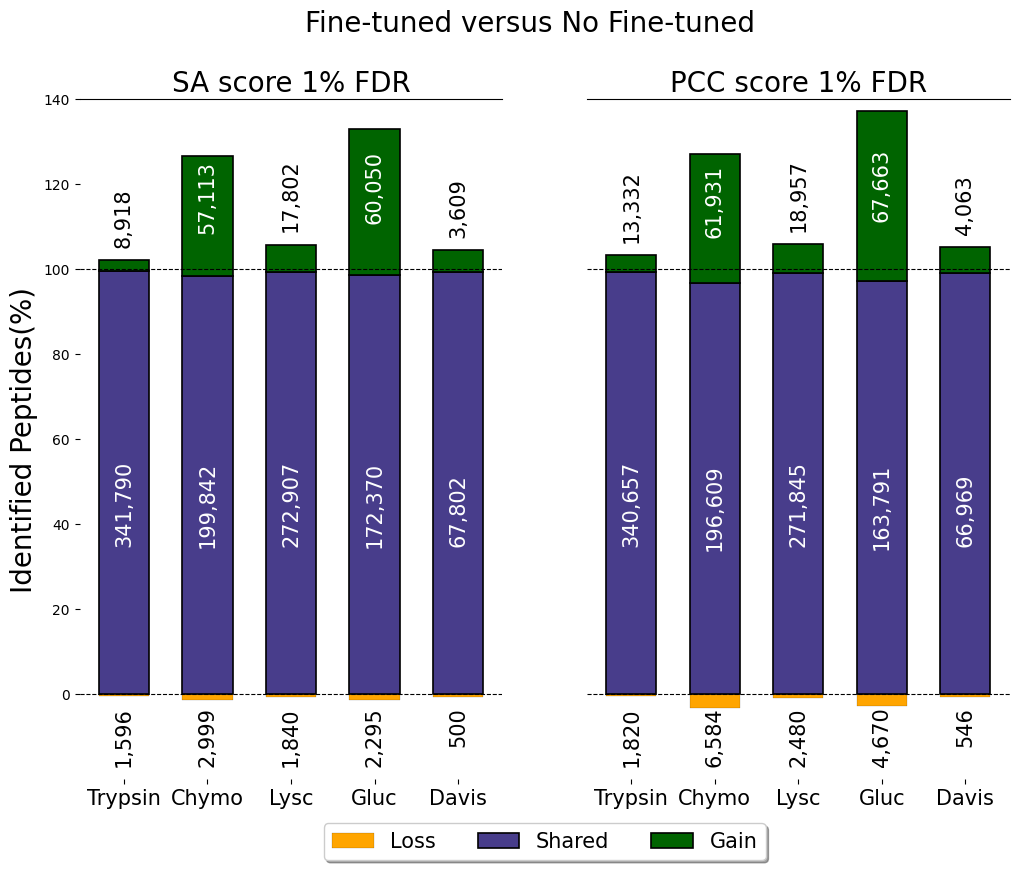

In [8]:
from matplotlib.patches import FancyBboxPatch
labels = ["trypsin", 'chymo', 'lysc', 'gluc', 'davis']

losses = {}
shares = {}
gains = {}

losses_num = {}
shares_num = {}
gains_num = {}

losses['SA score'] = [-sa_compare[l][0]/sum(sa_compare[l][:2])*100 for l in labels]
shares['SA score'] = [sa_compare[l][1]/sum(sa_compare[l][:2])*100 for l in labels]
gains['SA score'] = [sa_compare[l][2]/sum(sa_compare[l][:2])*100 for l in labels]

losses_num['SA score'] = [sa_compare[l][0] for l in labels]
shares_num['SA score'] = [sa_compare[l][1] for l in labels]
gains_num['SA score'] = [sa_compare[l][2] for l in labels]

losses['PCC score'] = [-pcc_compare[l][0]/sum(pcc_compare[l][:2])*100 for l in labels]
shares['PCC score'] = [pcc_compare[l][1]/sum(pcc_compare[l][:2])*100 for l in labels]
gains['PCC score'] = [pcc_compare[l][2]/sum(pcc_compare[l][:2])*100 for l in labels]

losses_num['PCC score'] = [pcc_compare[l][0] for l in labels]
shares_num['PCC score'] = [pcc_compare[l][1] for l in labels]
gains_num['PCC score'] = [pcc_compare[l][2] for l in labels]

width = 0.6

names = ['SA score', 'PCC score']
fig, axs = plt.subplots(1, 2, figsize=(12, 9), dpi=100)

labels = [i[0].capitalize() + i[1:] for i in labels]
for i, (name, ax) in enumerate(zip(names, axs)):
    ax.axhline(0, color='black', linewidth=0.8, linestyle='--')
    ax.axhline(100, color='black', linewidth=0.8, linestyle='--')

    p1 = ax.bar(labels, losses[name], width, label='Loss',
                color='orange', linewidth=0.1, edgecolor="black")
    p2 = ax.bar(labels, shares[name], width, label='Shared',
                color='darkslateblue', linewidth=1.2, edgecolor="black")
    p3 = ax.bar(labels, gains[name], width, label='Gain',
                bottom=shares[name], color='darkgreen', linewidth=1.2, edgecolor="black")

    num_size = 15
    autolabel(p1, ax, losses_num[name], mode='bottom', fontsize=num_size)
    autolabel(p2, ax, shares_num[name], fontsize=num_size)
    autolabel(p3, ax, gains_num[name], mode='upper',
            select_idx=[0, 2, 4], fontsize=num_size)
    autolabel(p3, ax, gains_num[name], mode='inside',
            select_idx=[1, 3], fontsize=num_size)

    if i ==0:
        ax.set_ylabel('Identified Peptides(%)', fontsize=20)
        ax.legend(loc='upper center', bbox_to_anchor=(1.1, -0.05),
                  fancybox=True, shadow=True, ncol=5, prop={'size': 15})
    ax.set_title(f'{name} 1% FDR', fontsize=20)
    ax.set_ylim(-20, 140)
    if i == 0:
        ax.get_yaxis().set_ticks([20*i for i in range(8)])
    else:
        ax.get_yaxis().set_ticks([])
    ax.tick_params(axis='x', labelsize=15)
    # ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
fig.suptitle('Fine-tuned versus No Fine-tuned', fontsize=20)
fig.savefig(f"fig/fig2-bekker-sa-pcc-vennbar.pdf",dpi=300, bbox_inches="tight")


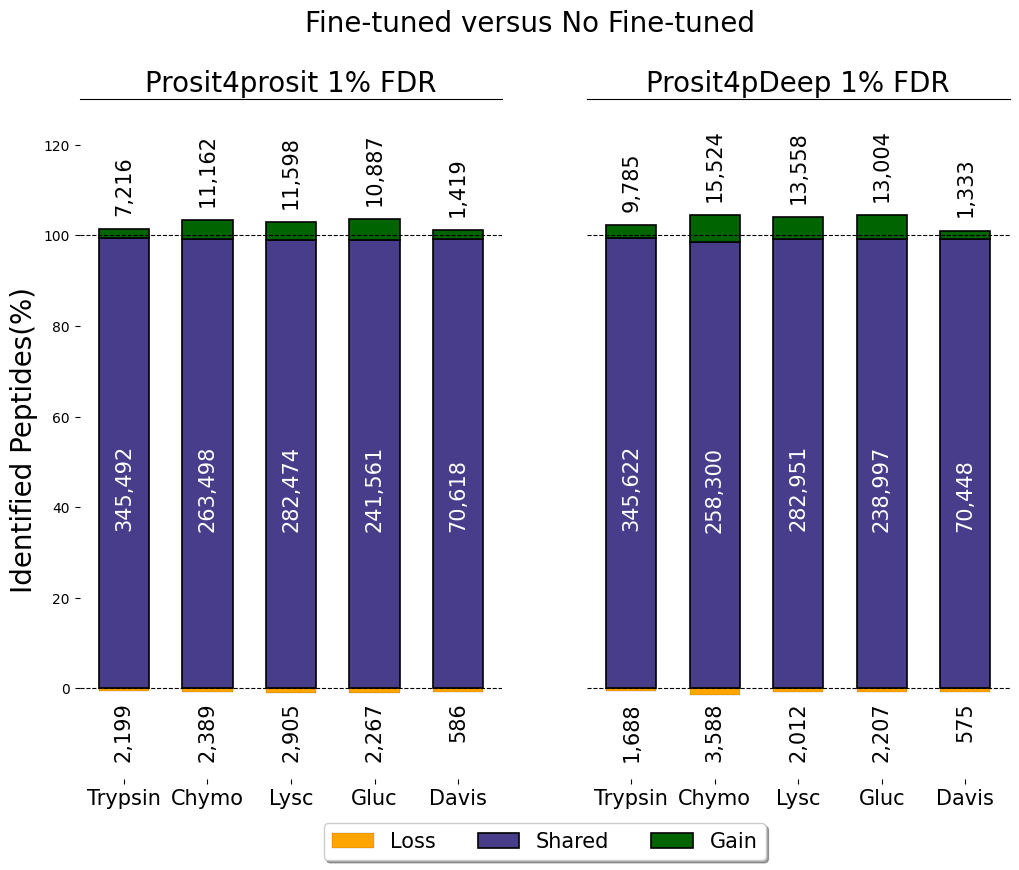

In [169]:
from matplotlib.patches import FancyBboxPatch
labels = ["trypsin", 'chymo', 'lysc', 'gluc', 'davis']

losses = {}
shares = {}
gains = {}

losses_num = {}
shares_num = {}
gains_num = {}

losses['Prosit4prosit'] = [-prosit_prosit_compare[l]
                      [0]/sum(prosit_prosit_compare[l][:2])*100 for l in labels]
shares['Prosit4prosit'] = [prosit_prosit_compare[l]
                      [1]/sum(prosit_prosit_compare[l][:2])*100 for l in labels]
gains['Prosit4prosit'] = [prosit_prosit_compare[l][2] /
                     sum(prosit_prosit_compare[l][:2])*100 for l in labels]

losses_num['Prosit4prosit'] = [prosit_prosit_compare[l][0] for l in labels]
shares_num['Prosit4prosit'] = [prosit_prosit_compare[l][1] for l in labels]
gains_num['Prosit4prosit'] = [prosit_prosit_compare[l][2] for l in labels]

losses['Prosit4pDeep'] = [-pdeep_prosit_compare[l][0] /
                              sum(pdeep_prosit_compare[l][:2])*100 for l in labels]
shares['Prosit4pDeep'] = [pdeep_prosit_compare[l][1] /
                              sum(pdeep_prosit_compare[l][:2])*100 for l in labels]
gains['Prosit4pDeep'] = [pdeep_prosit_compare[l]
                             [2]/sum(pdeep_prosit_compare[l][:2])*100 for l in labels]

losses_num['Prosit4pDeep'] = [pdeep_prosit_compare[l][0] for l in labels]
shares_num['Prosit4pDeep'] = [pdeep_prosit_compare[l][1] for l in labels]
gains_num['Prosit4pDeep'] = [pdeep_prosit_compare[l][2] for l in labels]

width = 0.6

names = ['Prosit4prosit', 'Prosit4pDeep']
fig, axs = plt.subplots(1, 2, figsize=(12, 9), dpi=100)

labels = [i[0].capitalize() + i[1:] for i in labels]
for i, (name, ax) in enumerate(zip(names, axs)):
    ax.axhline(0, color='black', linewidth=0.8, linestyle='--')
    ax.axhline(100, color='black', linewidth=0.8, linestyle='--')

    p1 = ax.bar(labels, losses[name], width, label='Loss',
                color='orange', linewidth=0.1, edgecolor="black")
    p2 = ax.bar(labels, shares[name], width, label='Shared',
                color='darkslateblue', linewidth=1.2, edgecolor="black")
    p3 = ax.bar(labels, gains[name], width, label='Gain',
                bottom=shares[name], color='darkgreen', linewidth=1.2, edgecolor="black")

    num_size = 15
    autolabel(p1, ax, losses_num[name], mode='bottom', fontsize=num_size)
    autolabel(p2, ax, shares_num[name], fontsize=num_size)
    autolabel(p3, ax, gains_num[name], mode='upper', fontsize=num_size)
    # autolabel(p3, ax, gains_num[name], mode='inside',
    #         select_idx=[1, 3], fontsize=num_size)

    if i ==0:
        ax.set_ylabel('Identified Peptides(%)', fontsize=20)
        ax.legend(loc='upper center', bbox_to_anchor=(1.1, -0.05),
                  fancybox=True, shadow=True, ncol=5, prop={'size': 15})
    ax.set_title(f'{name} 1% FDR', fontsize=20)
    ax.set_ylim(-20, 130)
    if i == 0:
        ax.get_yaxis().set_ticks([20*i for i in range(7)])
    else:
        ax.get_yaxis().set_ticks([])
    ax.tick_params(axis='x', labelsize=15)
    # ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
fig.suptitle('Fine-tuned versus No Fine-tuned', fontsize=20)
fig.savefig(f"fig/fig2-bekker-prosit-pdeep-vennbar.pdf",dpi=300, bbox_inches="tight")

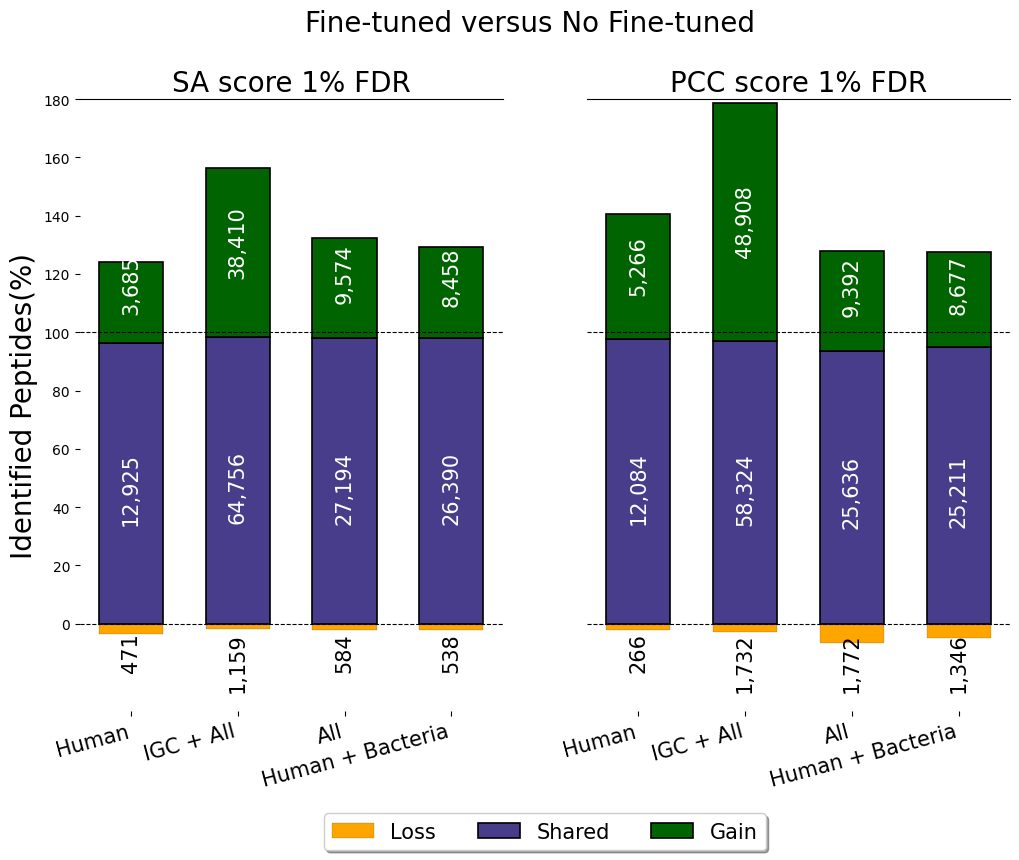

In [7]:
from matplotlib.patches import FancyBboxPatch
labels = ["sprot_human", 'IGC', 'sprot_all', 'sprot_bacteria_human']

losses = {}
shares = {}
gains = {}

losses_num = {}
shares_num = {}
gains_num = {}

losses['SA score'] = [-sa_compare[l][0]/sum(sa_compare[l][:2])*100 for l in labels]
shares['SA score'] = [sa_compare[l][1]/sum(sa_compare[l][:2])*100 for l in labels]
gains['SA score'] = [sa_compare[l][2]/sum(sa_compare[l][:2])*100 for l in labels]

losses_num['SA score'] = [sa_compare[l][0] for l in labels]
shares_num['SA score'] = [sa_compare[l][1] for l in labels]
gains_num['SA score'] = [sa_compare[l][2] for l in labels]

losses['PCC score'] = [-pcc_compare[l][0]/sum(pcc_compare[l][:2])*100 for l in labels]
shares['PCC score'] = [pcc_compare[l][1]/sum(pcc_compare[l][:2])*100 for l in labels]
gains['PCC score'] = [pcc_compare[l][2]/sum(pcc_compare[l][:2])*100 for l in labels]

losses_num['PCC score'] = [pcc_compare[l][0] for l in labels]
shares_num['PCC score'] = [pcc_compare[l][1] for l in labels]
gains_num['PCC score'] = [pcc_compare[l][2] for l in labels]

width = 0.6

names = ['SA score', 'PCC score']
fig, axs = plt.subplots(1, 2, figsize=(12, 9), dpi=100)

labels = ["Human", 'IGC + All', 'All', 'Human + Bacteria']
for i, (name, ax) in enumerate(zip(names, axs)):
    ax.axhline(0, color='black', linewidth=0.8, linestyle='--')
    ax.axhline(100, color='black', linewidth=0.8, linestyle='--')

    p1 = ax.bar(labels, losses[name], width, label='Loss',
                color='orange', linewidth=0.1, edgecolor="black")
    p2 = ax.bar(labels, shares[name], width, label='Shared',
                color='darkslateblue', linewidth=1.2, edgecolor="black")
    p3 = ax.bar(labels, gains[name], width, label='Gain',
                bottom=shares[name], color='darkgreen', linewidth=1.2, edgecolor="black")

    num_size = 15
    autolabel(p1, ax, losses_num[name], mode='bottom', fontsize=num_size)
    autolabel(p2, ax, shares_num[name], fontsize=num_size)
    # autolabel(p3, ax, gains_num[name], mode='upper',
    #         select_idx=[0, 2, 4], fontsize=num_size)
    autolabel(p3, ax, gains_num[name], mode='inside', fontsize=num_size)

    if i ==0:
        ax.set_ylabel('Identified Peptides(%)', fontsize=20)
        ax.legend(loc='upper center', bbox_to_anchor=(1.1, -0.15),
                  fancybox=True, shadow=True, ncol=5, prop={'size': 15})
    ax.set_title(f'{name} 1% FDR', fontsize=20)
    ax.set_ylim(-30, 180)
    # ax.set_xticklabels(ax.get_xticks(), rotation=45)
    if i == 0:
        ax.get_yaxis().set_ticks([20*i for i in range(10)])
    else:
        ax.get_yaxis().set_ticks([])
    ax.tick_params(axis='x', labelsize=15)
    # ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
fig.suptitle('Fine-tuned versus No Fine-tuned', fontsize=20)
fig.autofmt_xdate(rotation=15)
fig.savefig(f"fig/fig2-human-sa-pcc-vennbar.pdf",dpi=300, bbox_inches="tight")

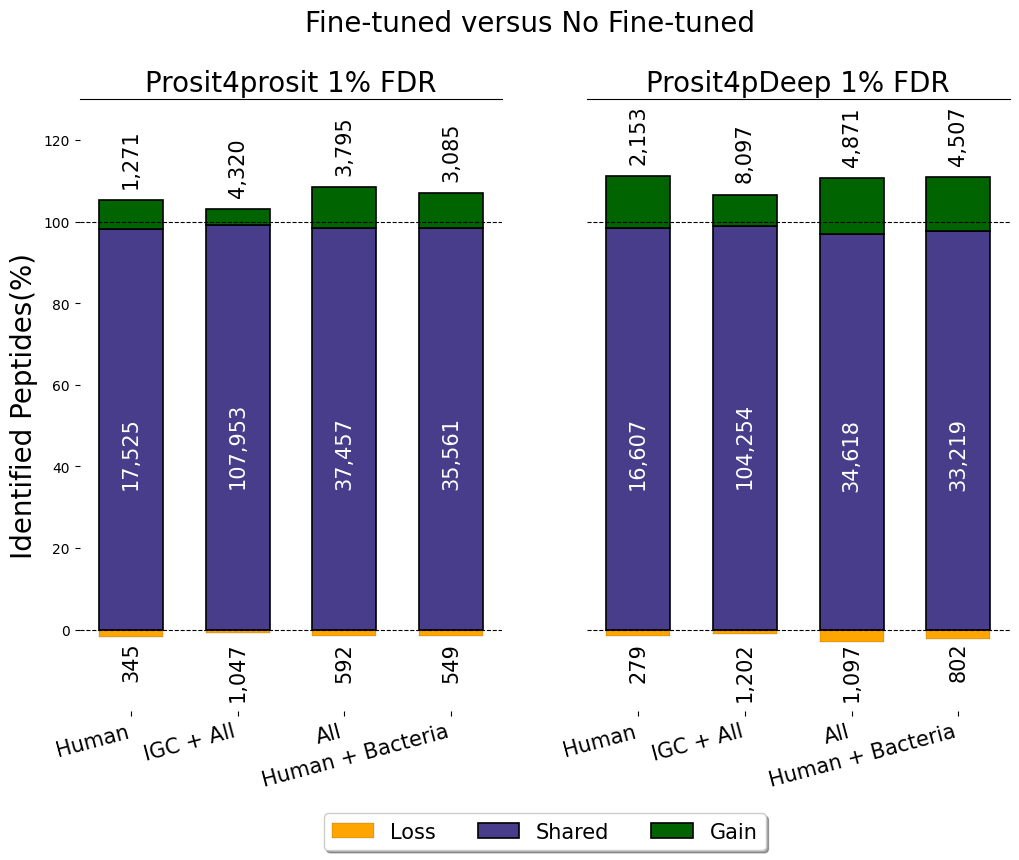

In [182]:
from matplotlib.patches import FancyBboxPatch
labels = ["sprot_human", 'IGC', 'sprot_all', 'sprot_bacteria_human']

losses = {}
shares = {}
gains = {}

losses_num = {}
shares_num = {}
gains_num = {}

losses['Prosit4prosit'] = [-prosit_prosit_compare[l]
                      [0]/sum(prosit_prosit_compare[l][:2])*100 for l in labels]
shares['Prosit4prosit'] = [prosit_prosit_compare[l]
                      [1]/sum(prosit_prosit_compare[l][:2])*100 for l in labels]
gains['Prosit4prosit'] = [prosit_prosit_compare[l][2] /
                     sum(prosit_prosit_compare[l][:2])*100 for l in labels]

losses_num['Prosit4prosit'] = [prosit_prosit_compare[l][0] for l in labels]
shares_num['Prosit4prosit'] = [prosit_prosit_compare[l][1] for l in labels]
gains_num['Prosit4prosit'] = [prosit_prosit_compare[l][2] for l in labels]

losses['Prosit4pDeep'] = [-pdeep_prosit_compare[l][0] /
                              sum(pdeep_prosit_compare[l][:2])*100 for l in labels]
shares['Prosit4pDeep'] = [pdeep_prosit_compare[l][1] /
                              sum(pdeep_prosit_compare[l][:2])*100 for l in labels]
gains['Prosit4pDeep'] = [pdeep_prosit_compare[l]
                             [2]/sum(pdeep_prosit_compare[l][:2])*100 for l in labels]

losses_num['Prosit4pDeep'] = [pdeep_prosit_compare[l][0] for l in labels]
shares_num['Prosit4pDeep'] = [pdeep_prosit_compare[l][1] for l in labels]
gains_num['Prosit4pDeep'] = [pdeep_prosit_compare[l][2] for l in labels]

width = 0.6

names = ['Prosit4prosit', 'Prosit4pDeep']
fig, axs = plt.subplots(1, 2, figsize=(12, 9), dpi=100)

labels = ["Human", 'IGC + All', 'All', 'Human + Bacteria']
for i, (name, ax) in enumerate(zip(names, axs)):
    ax.axhline(0, color='black', linewidth=0.8, linestyle='--')
    ax.axhline(100, color='black', linewidth=0.8, linestyle='--')

    p1 = ax.bar(labels, losses[name], width, label='Loss',
                color='orange', linewidth=0.1, edgecolor="black")
    p2 = ax.bar(labels, shares[name], width, label='Shared',
                color='darkslateblue', linewidth=1.2, edgecolor="black")
    p3 = ax.bar(labels, gains[name], width, label='Gain',
                bottom=shares[name], color='darkgreen', linewidth=1.2, edgecolor="black")

    num_size = 15
    autolabel(p1, ax, losses_num[name], mode='bottom', fontsize=num_size)
    autolabel(p2, ax, shares_num[name], fontsize=num_size)
    autolabel(p3, ax, gains_num[name], mode='upper', fontsize=num_size)
    # autolabel(p3, ax, gains_num[name], mode='inside',
    #         select_idx=[1, 3], fontsize=num_size)

    if i ==0:
        ax.set_ylabel('Identified Peptides(%)', fontsize=20)
        ax.legend(loc='upper center', bbox_to_anchor=(1.1, -0.15),
                  fancybox=True, shadow=True, ncol=5, prop={'size': 15})
    ax.set_title(f'{name} 1% FDR', fontsize=20)
    ax.set_ylim(-20, 130)
    if i == 0:
        ax.get_yaxis().set_ticks([20*i for i in range(7)])
    else:
        ax.get_yaxis().set_ticks([])
    ax.tick_params(axis='x', labelsize=15)
    # ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
fig.suptitle('Fine-tuned versus No Fine-tuned', fontsize=20)
fig.autofmt_xdate(rotation=15)
fig.savefig(f"fig/fig2-human-prosit-pdeep-vennbar.pdf",dpi=300, bbox_inches="tight")